In [25]:
import random, os
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mnist import MNIST

In [15]:
# Loaded in the same order than .npy files as the same seed is used

seed = 1
# Seed everything
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True

def load_MNIST():
    """
    Load and preprocess the MNIST dataset, without spike encoding.
    """
    mndata = MNIST()
    images, labels = mndata.load_training()
    
    # Training set
    X_train, y_train = np.asarray(images), np.asarray(labels)
    X_train = X_train.reshape(-1, 28, 28)
    # Random shuffling
    random_indices = np.random.permutation(len(X_train))
    X_train, y_train = X_train[random_indices], y_train[random_indices]

    # Testing set
    images, labels = mndata.load_testing()
    X_test, y_test = np.asarray(images), np.asarray(labels)
    X_test = X_test.reshape(-1, 28, 28)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_MNIST()
 
X_train = X_train[0:5000]
y_train = y_train[0:5000]

In [32]:
CHECKPOINTS = [0, 100, 200, 300, 400, 500, 600, 716]

sample_ids = []
for id in [1,2,3,4,5,6]:
    sample_ids.append(np.where(y_train==id)[0][0])

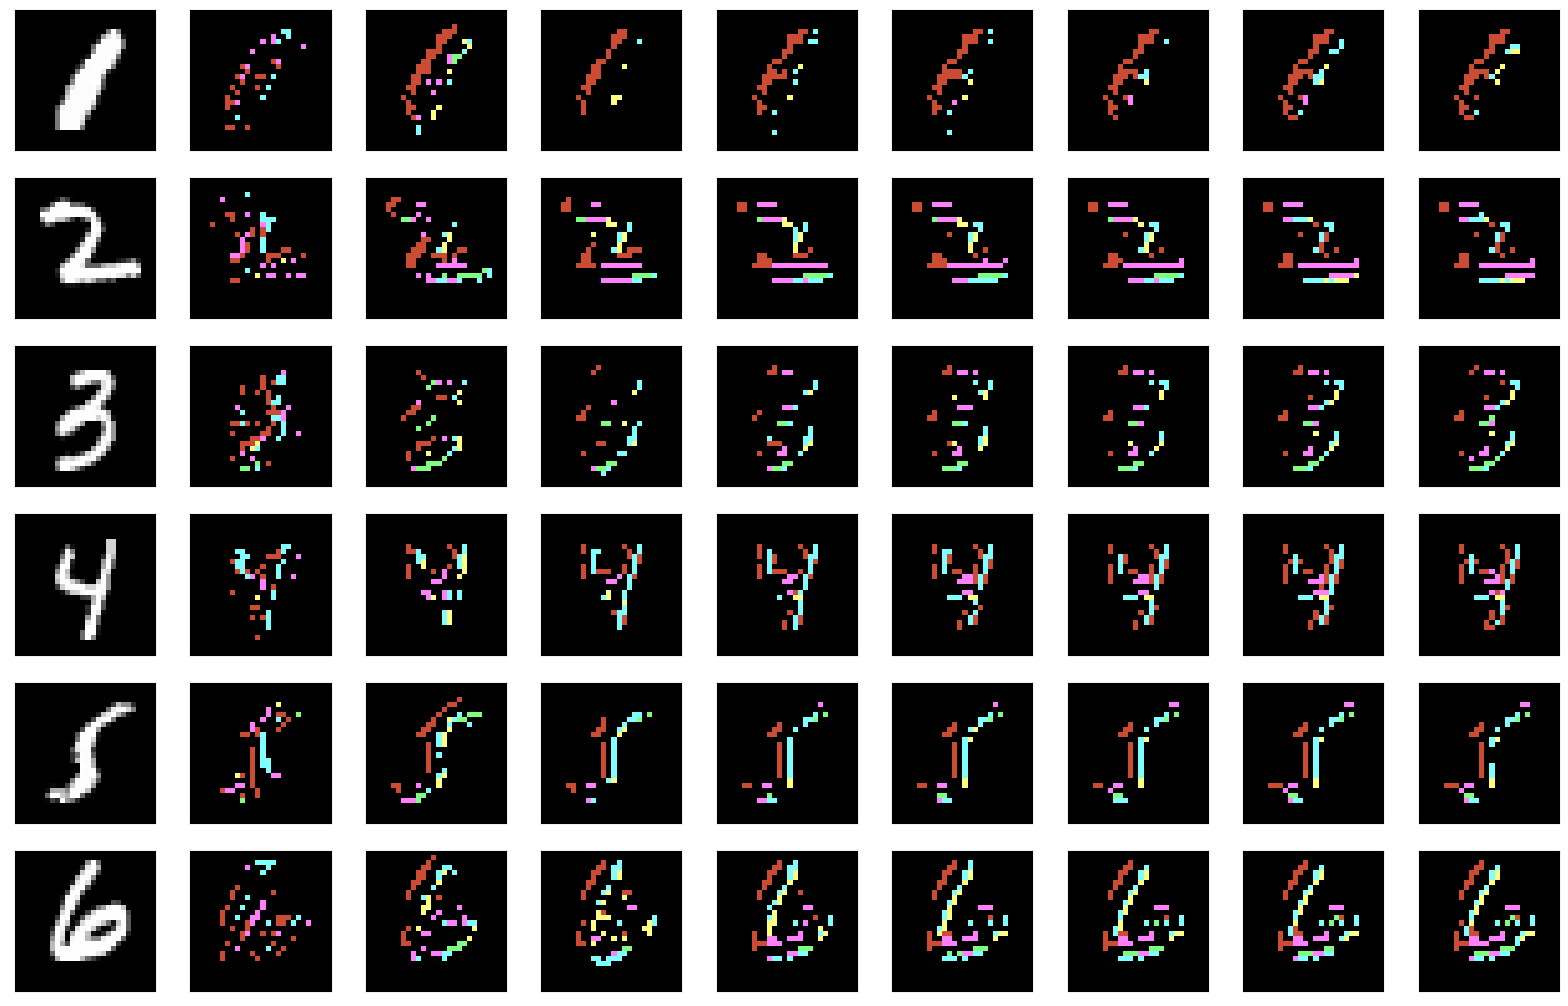

In [37]:
colorsList = [(0,0,0), (1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,0,0), (1,1,1), (0.5,0.5,1), 
              (1,0.5,0.5), (0.5,1,0.5), (1,0.5,1), (0.5,1,1), (1,1,0.5), (0.8,0.3,0.2), ]
CustomCmap = matplotlib.colors.ListedColormap(colorsList)


fig, ax = plt.subplots(nrows=len(sample_ids), ncols=len(CHECKPOINTS)+1, figsize=(20,13))
for sid,sample_id in enumerate(sample_ids):
    ax[sid,0].imshow(X_train[sample_id], cmap="gray")
    ax[sid,0].set_xticks([])
    ax[sid,0].set_yticks([])
    for i, nb_samples in enumerate(CHECKPOINTS):
        i += 1
        out = np.load(f"logs/output_conv_train_{nb_samples}_training_samples.npy")
        #out = np.load(f"logs/output_pool_train_{nb_samples}_training_samples.npy")
        img = np.zeros((28,28))
        for ft in range(40,55): #40,60
            img += out[sample_id][ft] * (ft+1)
        ax[sid,i].imshow(img, cmap=CustomCmap)
        ax[sid,i].set_xticks([])
        ax[sid,i].set_yticks([])
plt.show()

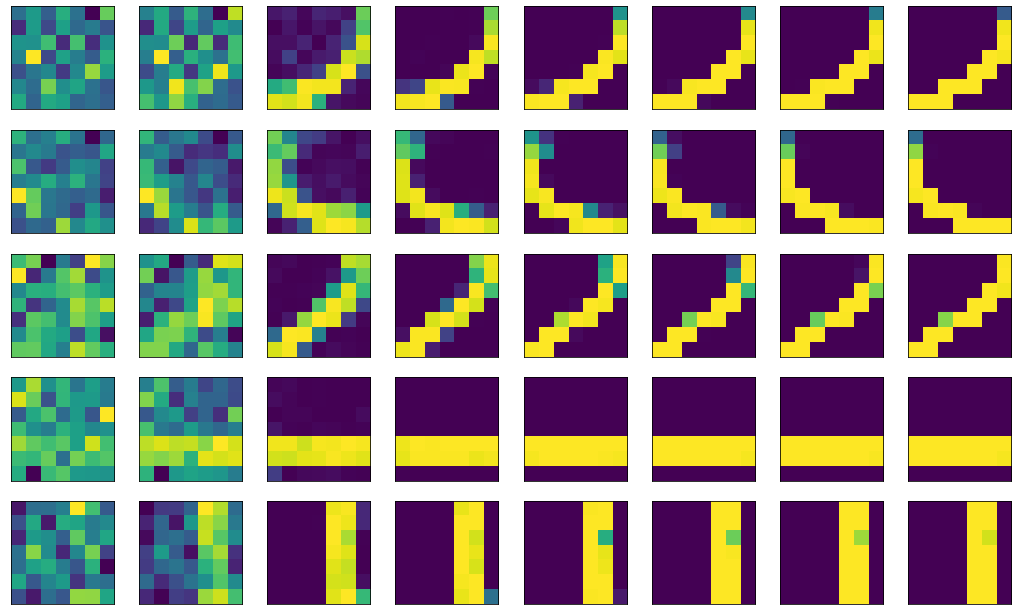

In [110]:
fig, ax = plt.subplots(nrows=5, ncols=len(CHECKPOINTS), figsize=(18,11))
for i,id in enumerate([2,23,55,42,52]): #11,14,30
    for j, nb_samples in enumerate(CHECKPOINTS):
        weights = np.load(f"logs/weights_{nb_samples}_training_samples.npy")
        ax[i,j].imshow(weights[id][0])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
plt.show()